### Decision Tree Regressor implementation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## california house pricing dataset
from sklearn.datasets import fetch_california_housing
california_df = fetch_california_housing()

In [4]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
california_df.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [6]:
california_df.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
california_df.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [8]:
df=pd.DataFrame(california_df.data, columns=california_df.feature_names)

In [9]:
df['Target'] = california_df.target
#taking sample data
df=df.sample(frac=0.25)

In [10]:
# independent variable
X=df.iloc[:,:-1]
# dependent variable
y=df.iloc[:,-1]

In [11]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2343,4.8100,15.0,6.540594,1.013861,1687.0,3.340594,36.82,-119.69
5231,1.0625,32.0,3.557078,0.917808,861.0,3.931507,33.93,-118.24
4670,1.8470,18.0,2.337027,1.082790,5229.0,3.408735,34.05,-118.29
11240,5.1180,33.0,6.049123,1.021053,943.0,3.308772,33.81,-117.95
1884,2.9091,23.0,6.794224,1.494585,673.0,2.429603,38.93,-119.99


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [15]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [16]:
y_pred=regressor.predict(X_test)

In [17]:
y_pred

array([0.729, 0.527, 1.568, ..., 2.281, 1.161, 0.942])

In [18]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [19]:
score

0.48593591560869787

In [21]:
### HyperParameter Tunning
parameter={
    "criterion" : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter" : ["best","random"],
    "max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12],
    "max_features" : ['auto','sqrt','log2']
    
}
regressor=DecisionTreeRegressor()

In [22]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv = GridSearchCV(regressor, param_grid=parameter , cv=2, scoring="neg_mean_squared_error")

In [23]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [25]:
regressorcv.best_params_

{'criterion': 'poisson',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

In [26]:
regressor1 = DecisionTreeRegressor(criterion='poisson', max_depth=6, max_features='auto', splitter='best')

In [27]:
regressor1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=6, max_features='auto')

[Text(0.5, 0.9285714285714286, 'X[0] <= 4.042\npoisson = 0.31\nsamples = 3457\nvalue = 2.072'),
 Text(0.25, 0.7857142857142857, 'X[5] <= 2.295\npoisson = 0.215\nsamples = 2166\nvalue = 1.59'),
 Text(0.125, 0.6428571428571429, 'X[0] <= 2.663\npoisson = 0.306\nsamples = 468\nvalue = 2.176'),
 Text(0.0625, 0.5, 'X[2] <= 3.421\npoisson = 0.251\nsamples = 198\nvalue = 1.589'),
 Text(0.03125, 0.35714285714285715, 'X[4] <= 1167.5\npoisson = 0.241\nsamples = 34\nvalue = 2.375'),
 Text(0.015625, 0.21428571428571427, 'X[6] <= 35.63\npoisson = 0.162\nsamples = 22\nvalue = 1.919'),
 Text(0.0078125, 0.07142857142857142, 'poisson = 0.124\nsamples = 12\nvalue = 2.35'),
 Text(0.0234375, 0.07142857142857142, 'poisson = 0.077\nsamples = 10\nvalue = 1.402'),
 Text(0.046875, 0.21428571428571427, 'X[3] <= 1.047\npoisson = 0.166\nsamples = 12\nvalue = 3.213'),
 Text(0.0390625, 0.07142857142857142, 'poisson = 0.019\nsamples = 3\nvalue = 1.995'),
 Text(0.0546875, 0.07142857142857142, 'poisson = 0.101\nsamples

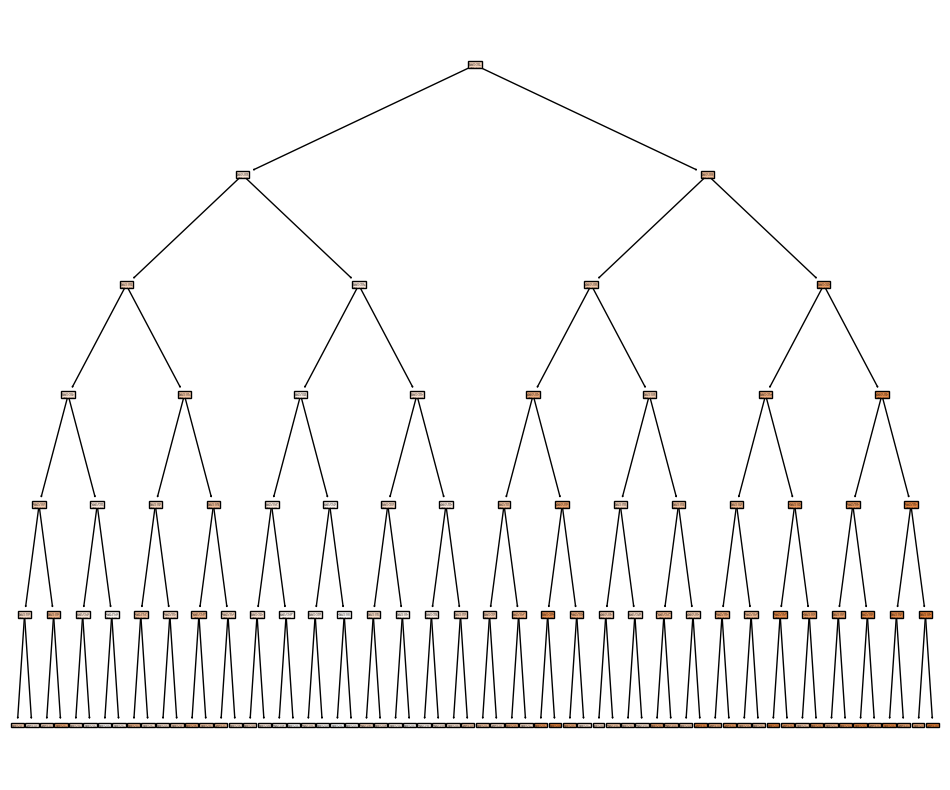

In [28]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor1, filled=True)

In [30]:
y_pred=regressor1.predict(X_test)

In [31]:
score2=r2_score(y_pred,y_test)

In [32]:
score2

0.5020788145004209

In [33]:
y_pred=regressorcv.predict(X_test)

In [34]:
score3=r2_score(y_pred,y_test)

In [35]:
score3

0.5053831459474469